# Работа с акселерометром
## Москвитин А.
## Карабонов М.
## 203C

Акселерометр - это прибор измеряющий проекцию кажущегося ускорения.

В рамках данной лабораторной работы мы с вами познакомимся с этими приборами с точки зрения пользователей. И сделаем несколько записей.  
В вашем мобильном телефоне (сейчас уже практически в любом) есть набор датчиков: блок акселерометров, блок гироскопов и магнитометр. Поэтому в рамках лабораторной работы мы будем с вами пользоваться вашим телефоном.
Для записей мы воспользуемся приложением:  
https://play.google.com/store/apps/details?id=com.kelvin.sensorapp&hl=en&gl=US  
Для Apple:  
https://apps.apple.com/us/app/physics-toolbox-sensor-suite/id1128914250

В следующей ячейке написана функция для чтения файлов записей. Используйте ее для считывания файлов и пример ее использования.

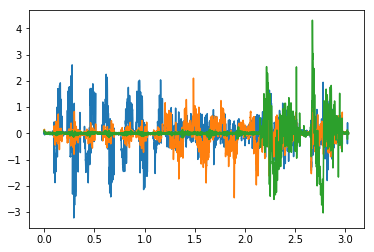

In [51]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import csv

def read_csv(fname):
    time = []
    x = []
    y = []
    z = []
    init = False
    n = 0
    t0 = 0
    with open(fname, newline = '') as csvfile:
        datareader = csv.reader(csvfile)
        
        for row in datareader:
            #print(row)
            #print(n)
            if (len(row) >= 4):
                if init:
                    n += 1
                    if t0 == 0:
                        t0 = float(row[0])
                    time.append((float(row[0]) - t0) / 10e9)
                    x.append(float(row[4]))
                    y.append(float(row[3]))
                    z.append(float(row[2]))
                else:
                    init = True
    return time, x, y, z, n

# Пример использования
t, ax, ay, az, n  = read_csv("Accelerometer.csv")
pyplot.plot(t, ax)
pyplot.plot(t, ay)
pyplot.plot(t, az)

Сделайте запись акселерометра в которой по каждой оси блока акселерометров по очереди будет воздействовать ускорение, постройте график полученной записи.  
<b>ВАЖНО! Обратите внимание что на сервере кафедры есть ограниечение на объем загружаемых файлов, поэтому файлы добжны быть не большими (ограничение 4 Мб)</b>

На основе сделанной записи обозначте направление осей блока акселерометров на данном рисунке:  
  
<img src="P.png">

Сделайте запись данных акселерометра согласно рисунку:  
  
<img src="4Перемещение.png">  
  
Обратите внимание начальная и конечная точки движения одинаковые. Однако в среденей точке маршрута телефон так же нужно положить. Постарайтесь что бы при перемещении в горизонтальной плоскости все ускорение проецировалось только на одну ось.  
Постройте график записи получившихся ускорений.

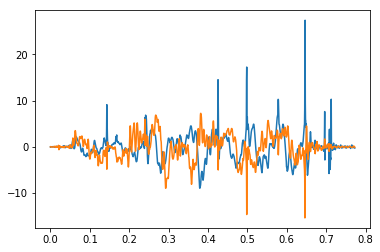

In [49]:
t, ax, ay, az, n  = read_csv("A2.csv")
pyplot.plot(t, az)
#pyplot.plot(t, ay)
pyplot.plot(t, ax)

Возьмите двойной интеграл ускорения по половине записи по оси по которой были наибольшие всплески ускорений. Возьмите двойной интеграл ускорения по полной записи с той же оси.  
Выведите результаты интегрирования.  

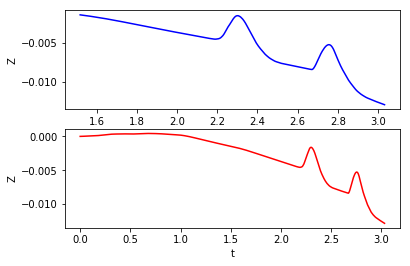

In [52]:
V = [0]
Z = [0]
fig = pyplot.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
l = (n // 2)
t0 = [t[l]]
Z0 = [0]
for i in range(n - 1):
    V.append(V[i] + az[i] *(t[i + 1] - t[i]))
    Z.append(Z[i] + V[i] *(t[i + 1] - t[i]) + 0.5 * az[i] * ((t[i + 1] - t[i]) ** 2))
Z0 = Z[l:]
t0 = t[l:]
        
ax1.plot(t0, Z0, 'b-')
ax2.plot(t, Z,'r-')

ax1.set_xlabel("t/2")
ax1.set_ylabel('Z')
ax2.set_xlabel('t')
ax2.set_ylabel('Z')
pyplot.show()

Опишите что получилось и почему.

На большом промежутке времени двойное интегрирование шумов даёт большую погрешность.
На малом - траектория движения телефона восстанавлисвается достаточно точно.

*\*Задание повышенной сложности (не обязательное)*  
При помощи акселерометра сделайте запись по которой можно будет восстановить задуманный вами рисунок (начните с простого варианта квадрат/треугольник).

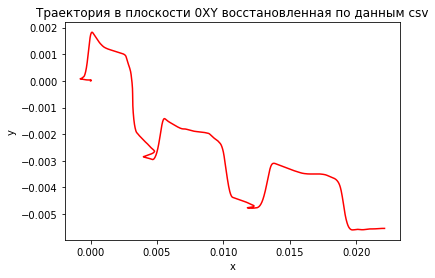

In [53]:
t, ax, ay, az, n = read_csv("P4.csv")
Vz = [0]
Z = [0]
Vy = [0]
Y = [0]
Vx = [0]
X = [0]
for i in range(n - 1):
    Vz.append(Vz[i] + az[i] *(t[i + 1] - t[i]))
    Z.append(Z[i] + Vz[i] *(t[i + 1] - t[i]) + 0.5 * az[i] * ((t[i + 1] - t[i]) ** 2))
    
    Vy.append(Vy[i] + ay[i] *(t[i + 1] - t[i]))
    Y.append(Y[i] + Vy[i] *(t[i + 1] - t[i]) + 0.5 * ay[i] * ((t[i + 1] - t[i]) ** 2))
    
    Vx.append(Vx[i] + ax[i] *(t[i + 1] - t[i]))
    X.append(X[i] + Vx[i] *(t[i + 1] - t[i]) + 0.5 * ax[i] * ((t[i + 1] - t[i]) ** 2))
#3d   
#fig = pyplot.figure()
#a = fig.add_subplot(111, projection='3d')
#a.scatter(X, Y, Z, c='r', marker='o')

#a.set_xlabel('X Label')
#a.set_ylabel('Y Label')
#a.set_zlabel('Z Label')

#2d
fig = pyplot.figure()
pyplot.title("Траектория в плоскости 0XY восстановленная по данным csv")
pyplot.plot(X, Y, "r-")
pyplot.xlabel("x")
pyplot.ylabel("y")

pyplot.show()

Выводы. Подведите итог выполненной лабораторной работы.

Акселерометр мобильного телефона в большей степени предназначен для удобства использования гаджета. Показания полученные с его помощью не позволюяют в лоб определить траекторию движения. Возможно, эту задачу получится решить при дополнительном анализе и корректировке входных данных, уменьшении шума. Двойное интегрирование остаточного шума даёт квадратично возрастающую ошибку положения, но на малых промежутка времени возможно оценить траекторию движения.